In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
import pandas as pd

# Create a dummy DataFrame to simulate MyMLData.csv
dummy_data = {
    'Input': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'Output': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]
}
dummy_df = pd.DataFrame(dummy_data)

# Save the dummy DataFrame to MyMLData.csv
dummy_df.to_csv('MyMLData.csv', index=False)

print("Created 'MyMLData.csv' with sample data.")

Created 'MyMLData.csv' with sample data.


In [ ]:
dataset1 = pd.read_csv('MyMLData.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [ ]:
# Name:HARISH KUMAR S
# Register Number:212224230091
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(1, 1)
        )

  def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
# Initialize the Model, Loss Function, and Optimizer
model = NeuralNet()
criterion = nn.MSELoss() # For regression task
optimizer = optim.SGD(model.parameters(), lr=0.01) # Stochastic Gradient Descent optimizer

In [ ]:
# Name:HARISH KUMAR S
# Register Number:212224230091
def train_model(ai_brain, X_train, y_train, criterion, optimizer, epochs=2000):
    # Initialize history if not already present
    if not hasattr(ai_brain, 'history'):
        ai_brain.history = {'loss': []}

    for epoch in range(epochs):
        # Forward pass
        outputs = ai_brain(X_train)
        loss = criterion(outputs, y_train)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ai_brain.history['loss'].append(loss.item())
        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')

In [ ]:
train_model(model, X_train_tensor, y_train_tensor, criterion, optimizer)

Epoch [0/2000], Loss: 0.270157
Epoch [200/2000], Loss: 0.114947
Epoch [400/2000], Loss: 0.048910
Epoch [600/2000], Loss: 0.020812
Epoch [800/2000], Loss: 0.008855
Epoch [1000/2000], Loss: 0.003769
Epoch [1200/2000], Loss: 0.001604
Epoch [1400/2000], Loss: 0.000684
Epoch [1600/2000], Loss: 0.000291
Epoch [1800/2000], Loss: 0.000125


In [ ]:
with torch.no_grad():
    test_loss = criterion(model(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

Test Loss: 0.000097


In [ ]:
loss_df = pd.DataFrame(model.history)

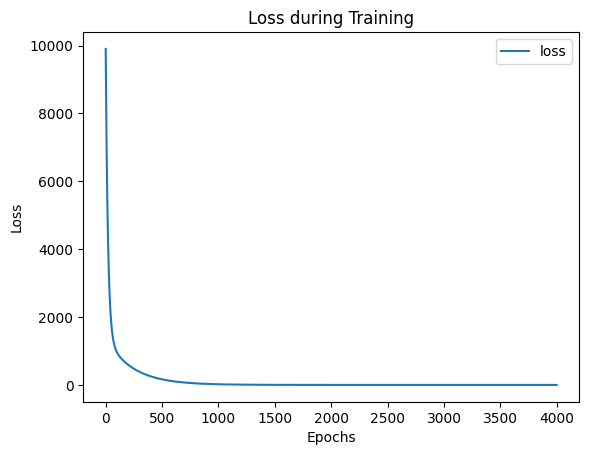

In [ ]:

import matplotlib.pyplot as plt
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

In [ ]:
X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = model(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print(f'Prediction: {prediction}')

Prediction: 1279.8319091796875
